# Exploring Dandiset 001354: Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation

**:warning: This notebook was automatically generated by AI and has not been manually verified! Please review the code and results carefully before drawing any conclusions or using for critical analysis.**

---

**Dandiset:** [https://dandiarchive.org/dandiset/001354/0.250312.0036](https://dandiarchive.org/dandiset/001354/0.250312.0036)

**Citation:** Klein, Peter (2025) Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation (Version 0.250312.0036) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001354/0.250312.0036

---

## Overview

This dataset contains single cell electrophysiological recordings of mouse hippocampal CA1 neurons in response to programmable antigen-gated GPCR activation. Recorded neurons were transfected and responses were recorded in response to specific ligand applications.

**Main data types:**
- Intracellular voltage recordings (CurrentClampSeries)
- Associated current clamp stimuli (CurrentClampStimulusSeries)

**This notebook will demonstrate:**
- Accessing Dandiset and asset metadata
- Loading and exploring an example NWB file from the Dandiset
- Displaying dataset structure and metadata
- Loading and visualizing intracellular voltage and stimulus data for illustration
- Providing links for deeper exploration and next steps

**You are encouraged to modify and expand upon these analyses for your own research questions.**

## Required Packages

Please ensure the following packages are installed in your Python environment:
- `dandi`
- `pynwb`
- `remfile`
- `h5py`
- `matplotlib`
- `numpy`
- `pandas`

_No installation will be performed by this notebook._

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pandas as pd

# ---
# Connect to the DANDI archive and retrieve Dandiset info

client = DandiAPIClient()
dandiset = client.get_dandiset("001354", "0.250312.0036")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description: {metadata['description']}")
print(f"Version: {metadata['version']}")

# List first 5 assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 asset file paths:")
for asset in islice(assets, 5):
    print(f"- {asset.path}")

Dandiset name: Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation
Dandiset URL: https://dandiarchive.org/dandiset/001354/0.250312.0036
Description: This dataset contains single cell electrophysiological recordings of mouse hippocampal CA1 neurons in response to activation of programmable antigen-gated G-protein-coupled engineered receptors. Recorded neurons were transfected with an AAV1/2-hSyn-a-mCherry-PAGER-Gi-P2A-mEGFP and responses were then recorded in response to DCZ (100 nM) or DCZ + soluble mCherry (1 uM) application.

The authors are grateful to the St Jude Children’s Research Hospital Collaborative Research Consortium on GPCRs, the Chan Zuckerberg Biohub–San Francisco, Phil and Penny Knight Initiative for Brain Resilience (KIG-104), Stanford Cancer Institute, Wu Tsai Neurosciences Institute of Stanford University and the NIH (MH135934 to A.Y.T. and I.S., F32CA257159 to N.A.K., NS121106 to I.S.) for funding this work. 

## Accessing an Example NWB File

For illustration, we will focus on this NWB file:

```
sub-PK-109/sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb
```

**Remote download URL:**  
[`https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/`](https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/)

_This may take some time to initialize as the data are streamed from the remote repository._

In [2]:
import pynwb
import h5py
import remfile

url = "https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Extract some basic NWB file metadata
print("NWB file identifier:", nwb.identifier)
print("Session description:", nwb.session_description)
print("Session start time:", nwb.session_start_time)
print("Subject ID:", getattr(getattr(nwb, 'subject', None), 'subject_id', 'None'))
print("Species:", getattr(getattr(nwb, 'subject', None), 'species', 'None'))
print("Subject sex:", getattr(getattr(nwb, 'subject', None), 'sex', 'None'))

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB file identifier: pk2024_07_17_0001
Session description: Intracellular electrophysiology experiment.
Session start time: 2024-07-17 15:08:30-07:00
Subject ID: PK-109
Species: Mus musculus
Subject sex: F


### Overview of Data Structure in This NWB File

The file contains the following main components:

**Electrodes:**  
- `electrode-0`
- `electrode-1`

**Acquired signals (`acquisition`):**  
- Many entries named like `current_clamp-response-XX-ch-0` and `current_clamp-response-XX-ch-1` for each trial/channel

**Stimuli (`stimulus`):**  
- Many entries named like `stimulus-XX-ch-0` and `stimulus-XX-ch-1`

**Tables:**  
- `intracellular_recordings` (recordings/trials)  
- `icephys_simultaneous_recordings`  
- `icephys_sequential_recordings`

_The file structure can be visualized as follows:_

```
NWBFile
├── icephys_electrodes
│   ├── electrode-0 (IntracellularElectrode)
│   └── electrode-1 (IntracellularElectrode)
├── acquisition
│   ├── current_clamp-response-01-ch-0 (CurrentClampSeries)
│   ├── current_clamp-response-01-ch-1 (CurrentClampSeries)
│   ├── ...
├── stimulus
│   ├── stimulus-01-ch-0 (CurrentClampStimulusSeries)
│   ├── stimulus-01-ch-1 (CurrentClampStimulusSeries)
│   ├── ...
├── intracellular_recordings (IntracellularRecordingsTable)
├── icephys_simultaneous_recordings (SimultaneousRecordingsTable)
├── icephys_sequential_recordings (SequentialRecordingsTable)
└── subject
```

See also:  
[Explore this file on neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/&dandisetId=001354&dandisetVersion=draft)

## Example: Load and Visualize a Signal + Stimulus from Trial 1 (Both Channels)

Let's examine the first response ("current_clamp-response-01-ch-0" and "ch-1") and the corresponding stimulus ("stimulus-01-ch-0" and "ch-1").

We load only a subset (first 5000 samples), as each response/stimulus is 100,000 samples and large to transmit/plot.

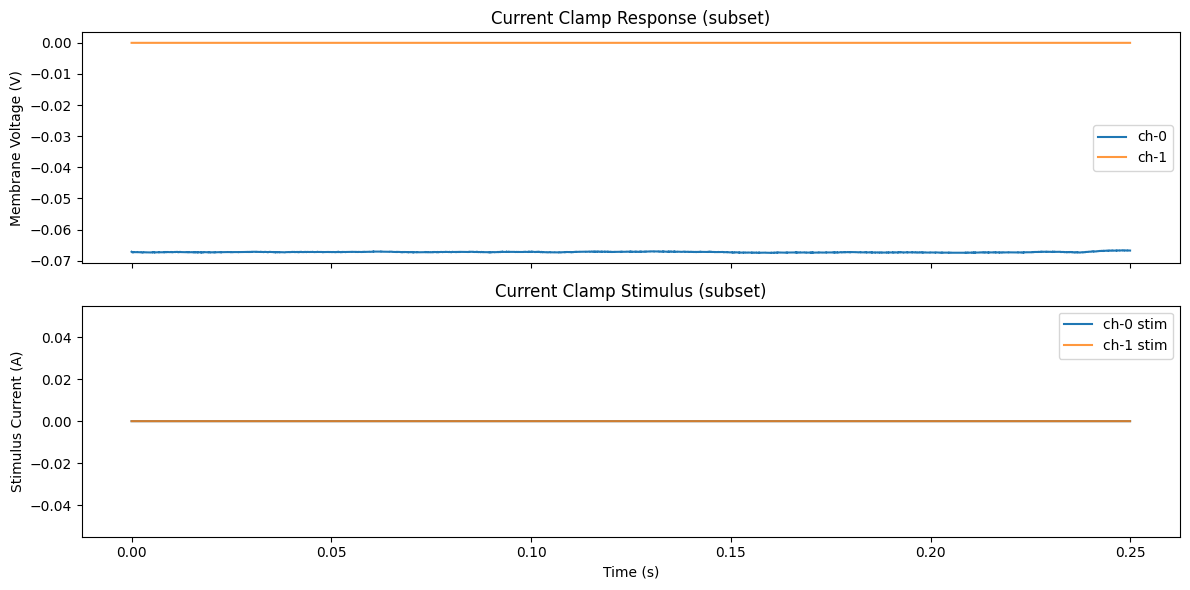

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Select the acquisition and stimulus objects (first trial, both channels)
response0 = nwb.acquisition['current_clamp-response-01-ch-0']
response1 = nwb.acquisition['current_clamp-response-01-ch-1']
stimulus0 = nwb.stimulus['stimulus-01-ch-0']
stimulus1 = nwb.stimulus['stimulus-01-ch-1']

# Get sampling rate and starting time
rate = response0.rate  # Hz
dt = 1 / rate
n_samples = 5000  # Only show first 5000 points for illustration

# Load data: convert to volts/amperes using the conversion factor
data0 = response0.data[:n_samples] * response0.conversion
data1 = response1.data[:n_samples] * response1.conversion
stim0 = stimulus0.data[:n_samples] * stimulus0.conversion
stim1 = stimulus1.data[:n_samples] * stimulus1.conversion

# Time axis
times = np.arange(n_samples) * dt + response0.starting_time

fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
axs[0].plot(times, data0, label='ch-0')
axs[0].plot(times, data1, label='ch-1', alpha=0.8)
axs[0].set_ylabel('Membrane Voltage (V)')
axs[0].set_title('Current Clamp Response (subset)')
axs[0].legend()

axs[1].plot(times, stim0, label='ch-0 stim')
axs[1].plot(times, stim1, label='ch-1 stim', alpha=0.8)
axs[1].set_ylabel('Stimulus Current (A)')
axs[1].set_xlabel('Time (s)')
axs[1].set_title('Current Clamp Stimulus (subset)')
axs[1].legend()

plt.tight_layout()
plt.show()

_**Note:** The above is just a single example trial. The file contains hundreds of trials, each with corresponding response and stimulus data for two channels. For additional analyses, you can iterate over entries in `nwb.acquisition` and `nwb.stimulus` as shown below._

In [4]:
print("Total number of acquisition entries:", len(nwb.acquisition))
print("Some acquisition keys:", list(islice(nwb.acquisition.keys(), 10)))
print("Total number of stimulus entries:", len(nwb.stimulus))
print("Some stimulus keys:", list(islice(nwb.stimulus.keys(), 10)))

Total number of acquisition entries: 624
Some acquisition keys: ['current_clamp-response-01-ch-0', 'current_clamp-response-01-ch-1', 'current_clamp-response-02-ch-0', 'current_clamp-response-02-ch-1', 'current_clamp-response-03-ch-0', 'current_clamp-response-03-ch-1', 'current_clamp-response-04-ch-0', 'current_clamp-response-04-ch-1', 'current_clamp-response-05-ch-0', 'current_clamp-response-05-ch-1']
Total number of stimulus entries: 624
Some stimulus keys: ['stimulus-01-ch-0', 'stimulus-01-ch-1', 'stimulus-02-ch-0', 'stimulus-02-ch-1', 'stimulus-03-ch-0', 'stimulus-03-ch-1', 'stimulus-04-ch-0', 'stimulus-04-ch-1', 'stimulus-05-ch-0', 'stimulus-05-ch-1']


## Example: View Table Structure

Let's show the structure of the `icephys_simultaneous_recordings` table as a pandas DataFrame:

In [5]:
if hasattr(nwb, 'icephys_simultaneous_recordings'):
    df = nwb.icephys_simultaneous_recordings.to_dataframe().head()
    display(df)
else:
    print("No icephys_simultaneous_recordings table found.")

,recordings
id,
0,electrodes \ ...
1,electrodes \ ...
2,electrodes \ ...
3,electrodes \ ...
4,electrodes \ ...


## Summary and Next Steps

In this notebook, we illustrated programmatic access to and inspection of a DANDI Archive intracellular electrophysiology dataset (Dandiset 001354), including loading and visualizing response/stimulus time series data from a selected NWB file with PyNWB. The dataset contains many more trials and fields to explore.

**Future analysis ideas:**
- Explore variability in responses across all trials or by groupings (e.g., conditions, time, etc.)
- Analyze membrane responses across different electrodes or sessions
- Examine stimulus/response alignment, peak patterns, adaptation, etc.
- Use the provided pandas tables to merge metadata and trialwise analysis

For extended exploration and visualization, see [this file on neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/&dandisetId=001354&dandisetVersion=draft).

---

_Remember: always review the code and outputs critically, especially as this notebook was AI-generated and the analysis is for demonstration purposes!_